# Python Deep Learning
# Ivan Vasilev, Daniel Slater, Gianmario Spacagna, Peter Roelants, Valentino Zocca
## Second Edition - Packt 
# Notes / Experiments with Python (and PyTorch, TensorFlow and Keras, among others)

## Chapter 1. Machine Learning - an Introduction
* AI can be defined, among other things, as a system that interact with its environment, using sensors and actuators.
* Machine learning can be seen as the way an AI tries and formulate appropriate answers as a function of the data available.
* Deep learning is a subfield of machine learning, mainly defined by the use of certain techniques/approaches. The most 
representative class of these methods are deep neural networks.

### Approaches to learning
* Supervised learning
* Unsupervised learning
* Reinforcement learning

### Supervised Learning
Supervised learning involves the use of previously-labeled data in order to learn its features, so they can then classify
new, similar but unlabeled data. This approaches needs **training data**. 

One way of thinking of supervised learning is as a function _f_ defined over a dataset, which comprises information organized
by **features**. 

```f: space of features -> classes = (discrete values or real values)``` 

We will use the ```MNIST``` dataset (Modified National Institute of Standard and Technology) to work on handwritten digits
recognition by means of either classification or regression approaches. In this case, we'll use images of 28x28 pixels of
size. **Our algorithm will use a 28x28 = 784-dimensional feature space to classify the digits**.

#### Linear and Logistic Regression
Regression algorithms are a type of supervised algos that uses features of the input data to predict a value, such as the
cost of a certain type of good, given a feature set. Regression tries to find the value of the parameters for the function
that best fits an input dataset.

In linear regression algos, the goal is to minimize the cost function (error of prediction from truth) by finding appropriate
values for the parameters of the function, over the input data that best approximates the target value. A popular example
is **mean square error** (MSE). A pseudo-code representation of this would be:
```
Given:
* a dataset comprising input/target pairs as (x[i], t[i]) for every i in range(len(dataset))
* a vector w containing random values of len(w) == len(features) == len(x[i])
For an arbitrarily large number of times, repeat:
    Err = 0  # initialize cost
    for every i in range(len(dataset))
        Err += (x[i] * w - t[i]) ** 2
    MSE = Err / len(dataset)
```

We iterate over the training data to compute the cost function to obtain the MSE, and then we use the gradient-descent
algorithm to update _w_ accordingly. This involves computing the derivatives of the cost function with respect of each
weight, in order to determine how the cost changes with respect of each weight. We'll see how this is remarkably similar
to the process used to train neural networks.

We can adapt the regression logic to a situation in which we want to reduce the outcome of our algorithm to a discrete,
categorical output (as opposed to a real-value output, such as the cost of a given good above). In this case we can use
**logistic regression**. It is imaginable as a probability between two certain possible outcomes, and the response label
is either one or the other possible outcome. To make this technique usable for classification problems, we need to introduce
a rule that determines the class based on the logistic function output (i.e. similar to a threshold). Boh.

#### Support Vector Machines
A support vector machine is a type of supervised machine learning algo used mainly for classification. It belongs
to the kernel method class of algos. An SVM tries to find a hyperplane separating the sample across its features.

#### Decision Trees
A decision tree takes on classification problems by representing the whole computation and decision process as a tree.
It is composed of decision nodes, in charge of testing specific attributes of the data, and leaf nodes, indicating the 
value of the target attribute. To begin a classification, we start at the root and navigate down the nodes until we 
reach a leaf. The _Iris flower dataset_ can be used to show this algorithm. We can create a decision tree to decide which
species a certain flower belongs to:
```
          Petal Length < 2.5
                  |
    *Iris Setosa* - Petal Width < 1.8
                           |                 
        Petal Length < 4.9 - *Iris Virginica*
                  |
*Iris Versicolor* - *Iris Virginica*
```
#### Naive Bayes
No, I'll come here later I think.

### Unsupervised Learning
This class involves methods that try to come to its own conclusions about the data without labels/ground truth. With
 **cluster analyisis**, we try finding "natural" clustering behaviors in the data, given certain features, to derive
the different classes possibly underlying the data (_k-means_ are an example of this subclass).

A different approach, **recurrent neural networks**, make use of the "context" of data (i.e., in natural language processing,
each word in a phrase is submitted, together with its neighboring words - the context - to simple neural nets). 

With **generative adversarial networks (GANs)**, we first train a network with large dataset, and then we use the network
to produce new examples similar to the training dataset. They can be used to colorize black and white photographs, alter
facial expressions in images and more.

### Reinforcement Learning
This third class involves having an algorithm try to maximize certain rewards obtained by interacting with an environment.
The _agent_ takes an action that changes the state of the environment. It then uses the new state and the reward to 
determine its next action. It has to do with using previous, progressively accumulated experience to improve in the task,
as opposed to just using ground truths to derive rules. 

#### Q-learning
Q-learning is an off-policy temporal-difference reinforcement learning algorithm. A suitable example is imagining trying
to create an ML agent that plays and tries to win a chess game. For any given time, the state of the chess game
is represented by the board configuration (i.e. the location of the pieces on the board). The agent needs then to take an
action, a, by moving a piece, thus changing the state of the board. The problem may be represented as a graph. Each
vertex represents a given board configuration, while each edge is a move that brings the state from one configuration of
the pieces (node) to another. By making a move, the agent moves from one edge to another, and uses a _Q-table_ to decide
which move to take. A Q-table has one row for each different board configuration (state, ```s```), and a column for each
possible action that the agent can take (a move, ```a```). A given cell of the Q-table, ```q(s, a)```, contains the 
potential total reward obtained for the remainder of the game if the agent takes an action ```a``` from the current state
```s``` and it's called **Q-value**. The Q-table is first initialized with arbitrary values, and it's then filled as the
game progresses and finishes. The Q-values are used to determine the "attractiveness" of a certain move in a certain state
in the attempt to ultimately win the game. It allows the agent to seek high potential rewards by exploring.

### Components of an ML solution
* Learner
* Training data
* Representation (how we express data in terms of selected features to provide the learner with)
* Goal (the reason to learn from the data, the aim)
* Target (what is being learned as well as the final output)

#### Creation of the test case
* Training set (what we use in training phase)
* Validation set (to evaluate the accuracy of the algo using unknown data. Sometimes we can fine-tune the model after
feedback from using the validation set, and it is used to determine when to stop learning)
* Test set (to use only **once** after training, to prevent introducing bias when over-tuning the data in successive
attempts with the same data points)

...

### Introduction to PyTorch
Finally!!!

In [18]:
import torch
import pandas as pd
import numpy as np

# Download and parse a CSV file from the Internet, containing 150 rows of the IRIS flower dataset
my_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                         names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
# Recode the categorical column 'species' from strings to codes ([0, 1, 2]) for the 3 flowers
my_dataset['species'] = pd.Categorical(my_dataset['species']).codes
# Shuffle the order of the rows of the dataset
my_dataset = my_dataset.sample(frac=1, random_state=1234)

print(len(my_dataset.values))
train_input = my_dataset.values[:120, :4]  # The majority of the rows will be training dataset, exclude the column containing the ground truth
train_target = my_dataset.values[:120, 4]  # Store the ground truth only for 120 of the rows, like above

test_input = my_dataset.values[120:, :4]  # Same for the test dataset, only using the last 30 rows for this
test_target = my_dataset.values[120:, 4]

torch.manual_seed(1234)  # reproducibility

hidden_units = 5  # One hidden layer containing 5 neurons

# Feed-forward network, 1 hidden layer (5 units), rectified linear activation function and 1 output layer with 3 units
net = torch.nn.Sequential(
    torch.nn.Linear(4, hidden_units),  # first layer, 4 neurons, one per variable of interest (sepal_length, sepal_width, etc.)
    torch.nn.ReLU(),  # rectified linear activation function
    torch.nn.Linear(hidden_units, 3)  # output layer, 3 units (one per possible flower type)
)

# Optimizer
my_crit = torch.nn.CrossEntropyLoss()  # cross entropy loss as loss function
my_optim = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)  # stochastic gradient descent as optimizer

# training loop
epochs = 50

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    targets = torch.autograd.Variable(torch.Tensor(train_target).long())
    
    my_optim.zero_grad()  # Start with fresh zeroed gradients for the current epoch
    out = net(inputs)  # submit the inputs to the net
    loss = my_crit(out, targets)  # how far were we from the truth?
    loss.backward()  # Compute contributions of each weight
    my_optim.step()  # attempt improvement
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))
        
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).long())

my_optim.zero_grad()
out = net(inputs)
_, predicted = torch.max(out.data, 1)

error_count = test_target.size - np.count_nonzero((targets == predicted).numpy())
print('Errors: %d, Accuracy: %d%%' % (error_count, 100 * torch.sum(targets == predicted) / test_target.size))

150
Epoch 1 Loss: 1.2181
Epoch 10 Loss: 0.6745
Epoch 20 Loss: 0.2447
Epoch 30 Loss: 0.1397
Epoch 40 Loss: 0.1001
Epoch 50 Loss: 0.0855
Errors: 0, Accuracy: 100%


It worked perfectly.
## 2. Neural Networks
### Intro to neural networks
* Information occurs mathematically, over simple elements called **neurons**
* Neurons are connected and exchange signals (i.e. numbers) between each other through links
* Each link has a **weight**, determining how information is processed as it passes through
* Each neuron has an internal state, determined by all the incoming links
* Each neuron has an **activation function** which determines the output signal as a function of its state

The **architecture** of a neural network defines what type of connectivity the units have (i.e. feedforward, recurrent, multi-
or single-layered, etc.), the number of layers and of neurons within each layer.
The **learning** describes how the network adapt and improves; common tools are _gradient descent_ and _backpropagation_.

### Intro to neurons
Mathematically, a neuron is defined as:
```
y = f(sum(x[:] * w[:]) + b)
```
where ```x``` represents the inputs, and ```w``` represents the weights. ```b``` represents the _bias_ and its input is 
always 1.

### Intro to layers
In a neural network, the input layer represents the dataset and the initial conditions: if the net deals with grayscale 
images, the units in the first layer will represent the pixel intensity. The output layer can have more than one neuron:
usually we find one unit per possible answer/class.

### Multi-layer networks
Single layer networks can only classify linearly separable classes, but by adding **hidden layers** we can surpass this
limitation. Another condition for multi-layer network to classify linearly-inseparable classes is that their **activation
function must not be linear**.

### Different types of activation function
The most common activation functions are the following:
* ```f(a) = a``` - **identity function**
* ```f(a) = [1 if a >= 0, otherwise 0]``` - **threshold activity function**
* ```f(a) = 1 / (1 + exp(-a))``` - **logistic function**, or **logistic sigmoid** (0, 1)
* ```f(a) = 2 / (1 + exp(-a)) = (1 - exp(-a)) / (1 + exp(-a))``` - **bipolar sigmoid** (-1, 1)
* ```f(a) = (exp(a)-exp(-a)) / (exp(a) + exp(-a)) = (1 - exp(-2 * a)) / (1 + exp(-2 * a))``` - **hyperbolic tangent**, tanh (-1, 1)
* ``` f(a) = [a if a >= 0, otherwise 0]``` - **rectified linear unit**, **ReLU** (0, Inf)

### Example
Let's build a very simple net, one hidden layer with two neurons, and single input and output neurons. It will support
the idea that under the _Universal Approximation Theorem_ any continuous function on compact subsets of Rn can be 
approximated by a neural network with at least one hidden layer.

The step function starts at -5.0 and ends at 5.0


C:\Users\Luca\Anaconda3\envs\py37ML\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
C:\Users\Luca\Anaconda3\envs\py37ML\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


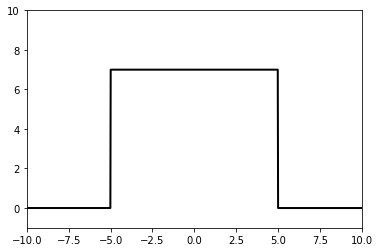

In [19]:
import matplotlib.pyplot as plt
import numpy as np

weight_value = 1000

bias_value_1 = 5000

bias_value_2 = -5000

plt.axis([-10, 10, -1, 10])

print("The step function starts at {0} and ends at {1}".format(-bias_value_1 / weight_value, -bias_value_2 / weight_value))

inputs = np.arange(-10, 10, 0.01)
outputs = list()

for x in inputs:
    y1 = 1.0 / (1.0 + np.exp(-weight_value * x - bias_value_1))
    y2 = 1.0 / (1.0 + np.exp(-weight_value * x - bias_value_2))
    
    w = 7
    
    y = y1 * w - y2 * w
    
    outputs.append(y)
plt.plot(inputs, outputs, lw=2, color='black')
plt.show()